<a href="https://colab.research.google.com/github/GreyPaldin/CV_LB1/blob/main/LB_vizhen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install opencv-python opencv-python-headless
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
#drive.mount('/content/drive')

image_MEM = '/content/CV_LB1/MEM_OPEN_CV.jpg'
img = image_MEM

fatal: destination path 'CV_LB1' already exists and is not an empty directory.
Reinitialized existing Git repository in /content/.git/
hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> CV_LB1
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached CV_LB1
hint: 
hint: See "git help submodule" for more information.
^C
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/YOUR_USERNAME/YOUR_REPOSITORY.git'


In [2]:
#Импорт изображений
#image_MEM = '/content/drive/MyDrive/MEM_OPEN_CV.jpg'



#img = image_MEM

In [ ]:
#@title Эррозия (тест)
#Эррозия изображения

def erosion_manual(img, kernel_size):
    """
    Реализует эрозию без использования OpenCV для одноканального изображения.

    Args:
        img: NumPy массив, представляющий одноканальное изображение (в оттенках серого).
        kernel_size: Нечетное целое число, размер ядра.

    Returns:
        NumPy массив, представляющий изображение после эрозии, или None в случае ошибки.
    """
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2
    eroded_img = np.zeros_like(img, dtype=np.uint8)

    for i in range(padding, rows - padding):
        for j in range(padding, cols - padding):
            window = img[i - padding:i + padding + 1, j - padding:j + padding + 1]
            eroded_img[i, j] = np.min(window)

    return eroded_img

def erosion_color(img, kernel_size):
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы
    b_eroded = erosion_manual(b, kernel_size)  # Эрозия синего канала
    g_eroded = erosion_manual(g, kernel_size)  # Эрозия зеленого канала
    r_eroded = erosion_manual(r, kernel_size)  # Эрозия красного канала

    if b_eroded is None or g_eroded is None or r_eroded is None:
        print("Ошибка: Произошла ошибка при эрозии одного из каналов.")
        return None

    eroded_img = cv2.merge((b_eroded, g_eroded, r_eroded))  # Объединение каналов
    return eroded_img

image_path = img  # Замените на путь к вашему изображению

# 2. Укажите размер ядра (параметр: kernel_size)
kernel_size = 11  # Размер ядра (нечетное число, например 3, 5, 7)

# 3. Загрузка изображения с использованием cv2.imread()
try:
    img = cv2.imread(image_path)  # Функция cv2.imread() загружает изображение
    if img is None:  # Проверка, что изображение успешно загружено
        raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
except FileNotFoundError as e:
    print(e)
    exit()
except Exception as e:
    print(f"Ошибка при загрузке изображения: {e}")
    exit()

# 4. Применение функции erosion_color() для эрозии цветного изображения
eroded_img = erosion_color(img, kernel_size)  # Применение функции erosion_color

# 5. Отображение исходного и обработанного изображения
if eroded_img is not None:  # Проверка, что эрозия выполнена успешно
    print("Исходное изображение:")
    cv2_imshow(img)  # Функция cv2_imshow() отображает изображение в Colab
    print("\nИзображение после эрозии:")
    cv2_imshow(eroded_img)  # Функция cv2_imshow() отображает изображение в Colab
else:
    print("Обработка изображения не удалась.")  # Сообщение об ошибке, если эрозия не удалась

In [ ]:
#@title Дилатация (тест)
#Дилатация
def dilation_manual(img, kernel_size):
    """
    Реализует дилатацию без использования OpenCV для одноканального изображения.

    Args:
        img: NumPy массив, представляющий одноканальное изображение (в оттенках серого).
        kernel_size: Нечетное целое число, размер ядра.

    Returns:
        NumPy массив, представляющий изображение после дилатации, или None в случае ошибки.
    """
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2
    dilated_img = np.zeros_like(img, dtype=np.uint8)

    for i in range(padding, rows - padding):
        for j in range(padding, cols - padding):
            window = img[i - padding:i + padding + 1, j - padding:j + padding + 1]
            dilated_img[i, j] = np.max(window)  # Используем np.max вместо np.min

    return dilated_img

# ============================================================================
# БЛОК 2: Функция дилатации для цветного изображения (RGB)
# ============================================================================
def dilation_color(img, kernel_size):
    """
    Реализует дилатацию для цветного изображения (RGB), применяя dilation_manual к каждому каналу.

    Args:
        img: NumPy массив, представляющий цветное изображение (RGB).
        kernel_size: Нечетное целое число, размер ядра.

    Returns:
        NumPy массив, представляющий цветное изображение после дилатации, или None в случае ошибки.
    """
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы
    b_dilated = dilation_manual(b, kernel_size)  # Дилатация синего канала
    g_dilated = dilation_manual(g, kernel_size)  # Дилатация зеленого канала
    r_dilated = dilation_manual(r, kernel_size)  # Дилатация красного канала

    if b_dilated is None or g_dilated is None or r_dilated is None:
        print("Ошибка: Произошла ошибка при дилатации одного из каналов.")
        return None

    dilated_img = cv2.merge((b_dilated, g_dilated, r_dilated))  # Объединение каналов
    return dilated_img


# ============================================================================
# ПОСЛЕДОВАТЕЛЬНЫЙ КОД ДЛЯ ЗАГРУЗКИ, ОБРАБОТКИ И ОТОБРАЖЕНИЯ
# ============================================================================

# 1. Укажите путь к изображению (параметр: image_path)
image_path = img  # Замените на путь к вашему изображению

# 2. Укажите размер ядра (параметр: kernel_size)
kernel_size = 3  # Размер ядра (нечетное число, например 3, 5, 7)

# 3. Загрузка изображения с использованием cv2.imread()
try:
    img = cv2.imread(image_path)  # Функция cv2.imread() загружает изображение
    if img is None:  # Проверка, что изображение успешно загружено
        raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
except FileNotFoundError as e:
    print(e)
    exit()
except Exception as e:
    print(f"Ошибка при загрузке изображения: {e}")
    exit()

# 4. Применение функции dilation_color() для дилатации цветного изображения
dilated_img = dilation_color(img, kernel_size)  # Применение функции dilation_color

# 5. Отображение исходного и обработанного изображения
if dilated_img is not None:  # Проверка, что дилатация выполнена успешно
    print("Исходное изображение:")
    cv2_imshow(img)  # Функция cv2_imshow() отображает изображение в Colab
    print("\nИзображение после дилатации:")
    cv2_imshow(dilated_img)  # Функция cv2_imshow() отображает изображение в Colab
else:
    print("Обработка изображения не удалась.")  # Сообщение об ошибке, если дилатация не удалась

In [ ]:
#@title единннннй фильтр (тест)
#Мединннннй фильтр
def median_filter_manual(img, kernel_size):
    """Применение медианного фильтра без явного padding (пропуск границ)."""

    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape[:2]
    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2  # Определяем размер отступа

    median_filtered_img = np.zeros_like(img, dtype=img.dtype)

    for i in range(padding, rows - padding):
        for j in range(padding, cols - padding):
            window = img[i - padding:i + padding + 1, j - padding:j + padding + 1]

            # Для цветных изображений вычисляем медиану по каждому каналу
            if len(img.shape) == 3:
                median_filtered_img[i, j, 0] = np.median(window[:, :, 0]) # B
                median_filtered_img[i, j, 1] = np.median(window[:, :, 1]) # G
                median_filtered_img[i, j, 2] = np.median(window[:, :, 2]) # R
            else: # Для ЧБ изображений
                median_filtered_img[i, j] = np.median(window)

    return median_filtered_img

# Пример использования:
if __name__ == '__main__':
    image_path = img
    kernel_size = 11

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    median_filtered_img = median_filter_manual(img, kernel_size)

    if median_filtered_img is not None:
        print("Исходное изображение:")
        cv2_imshow(img)
        print("\nИзображение после медианного фильтра:")
        cv2_imshow(median_filtered_img)
    else:
        print("Обработка изображения не удалась.")

In [ ]:
#@title Гаусовый (тест)
def gaussian_filter_manual(img, kernel_size, sigma):
    """Применение фильтра Гаусса без явного padding (пропуск границ)."""

    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape[:2]
    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2

    # Создаем ядро Гаусса
    gaussian_kernel = generate_gaussian_kernel(kernel_size, sigma)

    gaussian_filtered_img = np.zeros_like(img, dtype=img.dtype)

    for i in range(padding, rows - padding):
        for j in range(padding, cols - padding):
            window = img[i - padding:i + padding + 1, j - padding:j + padding + 1]

            # Для цветных изображений применяем фильтр к каждому каналу
            if len(img.shape) == 3:
                for channel in range(3):
                    gaussian_filtered_img[i, j, channel] = np.sum(window[:, :, channel] * gaussian_kernel)
            else: # Для ЧБ изображений
                gaussian_filtered_img[i, j] = np.sum(window * gaussian_kernel)

    return gaussian_filtered_img

def generate_gaussian_kernel(kernel_size, sigma):
    """Генерирует ядро Гаусса заданного размера и стандартного отклонения."""

    x, y = np.mgrid[-(kernel_size // 2):(kernel_size // 2) + 1, -(kernel_size // 2):(kernel_size // 2) + 1]
    gaussian_kernel = np.exp(- (x**2 + y**2) / (2 * sigma**2))
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)  # Нормализуем ядро
    return gaussian_kernel

# Пример использования:
if __name__ == '__main__':
    image_path = img
    kernel_size = 11
    sigma = 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    gaussian_filtered_img = gaussian_filter_manual(img, kernel_size, sigma)

    if gaussian_filtered_img is not None:
        print("Исходное изображение:")
        cv2_imshow(img)
        print("\nИзображение после фильтра Гаусса:")
        cv2_imshow(gaussian_filtered_img)
    else:
        print("Обработка изображения не удалась.")

In [ ]:
#@title Бинарный (тест)

def binarization_color_manual(img, threshold):
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    binarized_img = np.zeros_like(img, dtype=np.uint8)
    rows, cols, channels = img.shape

    for i in range(rows):
        for j in range(cols):
            for channel in range(channels):
                if img[i, j, channel] > threshold:
                    binarized_img[i, j, channel] = 255  # Белый цвет
                else:
                    binarized_img[i, j, channel] = 0  # Черный цвет

    return binarized_img

# Пример использования:
if __name__ == '__main__':
    image_path = img
    threshold_value = 128  # Пороговое значение

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    binarized_img = binarization_color_manual(img, threshold_value)

    if binarized_img is not None:
        print("Исходное изображение:")
        cv2_imshow(img)
        print("\nБинаризованное изображение:")
        cv2_imshow(binarized_img)
    else:
        print("Обработка изображения не удалась.")

In [ ]:
#@title Увеличение яркости (тест)

def adjust_brightness_color_manual(img, brightness_factor):
    """Корректировка освещения для цветного (RGB) изображения.

    Args:
        img: NumPy массив, представляющий цветное (RGB) изображение.
        brightness_factor: Коэффициент корректировки яркости.  Значения > 1 делают изображение ярче, < 1 - темнее.

    Returns:
        NumPy массив, представляющий изображение с измененной яркостью.
    """

    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    adjusted_img = img.astype(np.float64)  # Преобразуем в float64, чтобы избежать переполнения

    adjusted_img = adjusted_img * brightness_factor

    #Обрезаем значения, чтобы они оставались в диапазоне 0-255
    adjusted_img = np.clip(adjusted_img, 0, 255)

    adjusted_img = adjusted_img.astype(np.uint8)  # Возвращаем к типу uint8

    return adjusted_img

# Пример использования:
if __name__ == '__main__':
    image_path = img
    brightness_factor = 4  # Увеличиваем яркость в 1.5 раза

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    adjusted_img = adjust_brightness_color_manual(img, brightness_factor)

    if adjusted_img is not None:
        print("Исходное изображение:")
        cv2_imshow(img)
        print("\nИзображение с измененной яркостью:")
        cv2_imshow(adjusted_img)
    else:
        print("Обработка изображения не удалась.")

Задачи


*   Переписать преобразование изображений (чтобы соседние пиксели копировались)
*   Детально почитать про каждую модель и описать её, чтобы понимать, как она работает



In [ ]:
#@title Фильтр эрозии (итоговый)
def erosion_manual(img, kernel_size, chanel):
    print("Канал - " + str(chanel))
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    print(f"Размер изображения до эрозии: {rows}x{cols}")

    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2

    # Создаем расширенное изображение с replicate padding
    padded_img = np.zeros((rows + 2 * padding, cols + 2 * padding), dtype=img.dtype)
    padded_img[padding:rows + padding, padding:cols + padding] = img

    # Заполняем границы
    padded_img[:padding, padding:cols + padding] = img[0, :]  # Верхняя граница
    padded_img[rows + padding:, padding:cols + padding] = img[rows - 1, :]  # Нижняя граница
    padded_img[:, :padding] = np.tile(padded_img[:, padding:padding+1], padding)  # Левая граница
    padded_img[:, cols + padding:] = np.tile(padded_img[:, cols + padding - 1:cols + padding], padding)  # Правая граница

    # Вывод информации о размере увеличенного изображения
    print(f"Размер изображения после добавления padding: {padded_img.shape[0]}x{padded_img.shape[1]}")

    eroded_img = np.zeros_like(img, dtype=img.dtype)

    # Применяем эрозию ко всему расширенному изображению
    for i in range(padding, rows + padding):
        for j in range(padding, cols + padding):
            window = padded_img[i - padding:i + padding + 1, j - padding:j + padding + 1]
            eroded_img[i-padding, j-padding] = np.min(window)

    print(f"Размер изображения после эрозии: {eroded_img.shape[0]}x{eroded_img.shape[1]}")
    print("")
    print("")
    return eroded_img


def erosion_color(img, kernel_size):
    """Применяет эрозию к цветному изображению с replicate padding."""
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы

    # Вывод промежуточного изображения каналов до эрозии
    print("Промежуточные изображения каналов до эрозии:")
    print(f"Размер синего канала: {b.shape[0]}x{b.shape[1]}")
    cv2_imshow(b)
    print(f"Размер зеленого канала: {g.shape[0]}x{g.shape[1]}")
    cv2_imshow(g)
    print(f"Размер красного канала: {r.shape[0]}x{r.shape[1]}")
    cv2_imshow(r)

    b_eroded = erosion_manual(b, kernel_size, "Синий канал")  # Эрозия синего канала
    g_eroded = erosion_manual(g, kernel_size, "Зелёный канал") # Эрозия зеленого канала
    r_eroded = erosion_manual(r, kernel_size,  "Красный канал") # Эрозия красного канала

    if b_eroded is None or g_eroded is None or r_eroded is None:
        print("Ошибка: Произошла ошибка при эрозии одного из каналов.")
        return None

    # Вывод промежуточного изображения каналов после эрозии
    print("Промежуточные изображения каналов после эрозии:")
    print(f"Размер синего канала после эрозии: {b_eroded.shape[0]}x{b_eroded.shape[1]}")
    cv2_imshow(b_eroded)
    print(f"Размер зеленого канала после эрозии: {g_eroded.shape[0]}x{g_eroded.shape[1]}")
    cv2_imshow(g_eroded)
    print(f"Размер красного канала после эрозии: {r_eroded.shape[0]}x{r_eroded.shape[1]}")
    cv2_imshow(r_eroded)

    eroded_img = cv2.merge((b_eroded, g_eroded, r_eroded))  # Объединение каналов
    print("")
    print("")
    print(f"Размер итогового изображения после эрозии: {eroded_img.shape[0]}x{eroded_img.shape[1]}")

    return eroded_img

# Загрузка изображения и применение эрозии
if __name__ == '__main__':
    image_path = img  # Замените на путь к вашему изображению
    kernel_size = 11  # Размер ядра (нечетное число)

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    print(f"Размер исходного изображения: {img.shape[0]}x{img.shape[1]}")
    eroded_img = erosion_color(img, kernel_size)

    if eroded_img is not None:
        print("")
        print("")
        print("Исходное изображение:")
        cv2_imshow(img)
        print("")
        print("")
        print("\nИзображение после эрозии:")
        cv2_imshow(eroded_img)
    else:
        print("Обработка изображения не удалась.")

In [ ]:
#@title Фильтр Дилатация(итоговый)
def dilation_manual(img, kernel_size, chanel):
    print("Канал - " + str(chanel))
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    print(f"Размер изображения до дилатации: {rows}x{cols}")

    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2

    # Создаем расширенное изображение с replicate padding
    padded_img = np.zeros((rows + 2 * padding, cols + 2 * padding), dtype=img.dtype)
    padded_img[padding:rows + padding, padding:cols + padding] = img

    # Заполняем границы
    padded_img[:padding, padding:cols + padding] = img[0, :]  # Верхняя граница
    padded_img[rows + padding:, padding:cols + padding] = img[rows - 1, :]  # Нижняя граница
    padded_img[:, :padding] = np.tile(padded_img[:, padding:padding+1], padding)  # Левая граница
    padded_img[:, cols + padding:] = np.tile(padded_img[:, cols + padding - 1:cols + padding], padding)  # Правая граница

    # Вывод информации о размере увеличенного изображения
    print(f"Размер изображения после добавления padding: {padded_img.shape[0]}x{padded_img.shape[1]}")

    dilated_img = np.zeros_like(img, dtype=img.dtype)

    # Применяем дилатацию ко всему расширенному изображению
    for i in range(padding, rows + padding):
        for j in range(padding, cols + padding):
            window = padded_img[i - padding:i + padding + 1, j - padding:j + padding + 1]
            dilated_img[i-padding, j-padding] = np.max(window)  # Заменяем np.min на np.max

    print(f"Размер изображения после дилатации: {dilated_img.shape[0]}x{dilated_img.shape[1]}")
    print("")
    print("")
    return dilated_img


def dilation_color(img, kernel_size):
    """Применяет дилатацию к цветному изображению с replicate padding."""
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы

    # Вывод промежуточного изображения каналов до дилатации
    print("Промежуточные изображения каналов до дилатации:")
    print(f"Размер синего канала: {b.shape[0]}x{b.shape[1]}")
    cv2_imshow(b)
    print(f"Размер зеленого канала: {g.shape[0]}x{g.shape[1]}")
    cv2_imshow(g)
    print(f"Размер красного канала: {r.shape[0]}x{r.shape[1]}")
    cv2_imshow(r)

    b_dilated = dilation_manual(b, kernel_size, "Синий канал")  # Дилатация синего канала
    g_dilated = dilation_manual(g, kernel_size, "Зелёный канал")  # Дилатация зеленого канала
    r_dilated = dilation_manual(r, kernel_size, "Красный канал")  # Дилатация красного канала

    if b_dilated is None or g_dilated is None or r_dilated is None:
        print("Ошибка: Произошла ошибка при дилатации одного из каналов.")
        return None

    # Вывод промежуточного изображения каналов после дилатации
    print("Промежуточные изображения каналов после дилатации:")
    print(f"Размер синего канала после дилатации: {b_dilated.shape[0]}x{b_dilated.shape[1]}")
    cv2_imshow(b_dilated)
    print(f"Размер зеленого канала после дилатации: {g_dilated.shape[0]}x{g_dilated.shape[1]}")
    cv2_imshow(g_dilated)
    print(f"Размер красного канала после дилатации: {r_dilated.shape[0]}x{r_dilated.shape[1]}")
    cv2_imshow(r_dilated)

    dilated_img = cv2.merge((b_dilated, g_dilated, r_dilated))  # Объединение каналов
    print("")
    print("")
    print(f"Размер итогового изображения после дилатации: {dilated_img.shape[0]}x{dilated_img.shape[1]}")

    return dilated_img

# Загрузка изображения и применение дилатации
if __name__ == '__main__':
    image_path = img  # Замените на путь к вашему изображению
    kernel_size = 11  # Размер ядра (нечетное число)

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    print(f"Размер исходного изображения: {img.shape[0]}x{img.shape[1]}")
    dilated_img = dilation_color(img, kernel_size)

    if dilated_img is not None:
        print("")
        print("")
        print("Исходное изображение:")
        cv2_imshow(img)
        print("")
        print("")
        print("\nИзображение после дилатации:")
        cv2_imshow(dilated_img)
    else:
        print("Обработка изображения не удалась.")

In [ ]:

#@title Медианный фильтр (итоговый)
def median_filter_manual(img, kernel_size, chanel):
    print("Канал - " + str(chanel))
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    print(f"Размер изображения до медианного фильтра: {rows}x{cols}")

    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2

    # Создаем расширенное изображение с replicate padding
    padded_img = np.zeros((rows + 2 * padding, cols + 2 * padding), dtype=img.dtype)
    padded_img[padding:rows + padding, padding:cols + padding] = img

    # Заполняем границы
    padded_img[:padding, padding:cols + padding] = img[0, :]  # Верхняя граница
    padded_img[rows + padding:, padding:cols + padding] = img[rows - 1, :]  # Нижняя граница
    padded_img[:, :padding] = np.tile(padded_img[:, padding:padding+1], padding)  # Левая граница
    padded_img[:, cols + padding:] = np.tile(padded_img[:, cols + padding - 1:cols + padding], padding)  # Правая граница

    # Вывод информации о размере увеличенного изображения
    print(f"Размер изображения после добавления padding: {padded_img.shape[0]}x{padded_img.shape[1]}")

    median_filtered_img = np.zeros_like(img, dtype=img.dtype)

    # Применяем медианный фильтр ко всему расширенному изображению
    for i in range(padding, rows + padding):
        for j in range(padding, cols + padding):
            window = padded_img[i - padding:i + padding + 1, j - padding:j + padding + 1]
            median_filtered_img[i-padding, j-padding] = np.median(window)  # Заменяем np.min на np.median

    print(f"Размер изображения после медианного фильтра: {median_filtered_img.shape[0]}x{median_filtered_img.shape[1]}")
    print("")
    print("")
    return median_filtered_img


def median_filter_color(img, kernel_size):
    """Применяет медианный фильтр к цветному изображению с replicate padding."""
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы

    # Вывод промежуточного изображения каналов до медианного фильтра
    print("Промежуточные изображения каналов до медианного фильтра:")
    print(f"Размер синего канала: {b.shape[0]}x{b.shape[1]}")
    cv2_imshow(b)
    print(f"Размер зеленого канала: {g.shape[0]}x{g.shape[1]}")
    cv2_imshow(g)
    print(f"Размер красного канала: {r.shape[0]}x{r.shape[1]}")
    cv2_imshow(r)

    b_filtered = median_filter_manual(b, kernel_size, "Синий канал")  # Медианный фильтр синего канала
    g_filtered = median_filter_manual(g, kernel_size, "Зелёный канал")  # Медианный фильтр зеленого канала
    r_filtered = median_filter_manual(r, kernel_size, "Красный канал")  # Медианный фильтр красного канала

    if b_filtered is None or g_filtered is None or r_filtered is None:
        print("Ошибка: Произошла ошибка при применении медианного фильтра к одному из каналов.")
        return None

    # Вывод промежуточного изображения каналов после медианного фильтра
    print("Промежуточные изображения каналов после медианного фильтра:")
    print(f"Размер синего канала после медианного фильтра: {b_filtered.shape[0]}x{b_filtered.shape[1]}")
    cv2_imshow(b_filtered)
    print(f"Размер зеленого канала после медианного фильтра: {g_filtered.shape[0]}x{g_filtered.shape[1]}")
    cv2_imshow(g_filtered)
    print(f"Размер красного канала после медианного фильтра: {r_filtered.shape[0]}x{r_filtered.shape[1]}")
    cv2_imshow(r_filtered)

    filtered_img = cv2.merge((b_filtered, g_filtered, r_filtered))  # Объединение каналов
    print("")
    print("")
    print(f"Размер итогового изображения после медианного фильтра: {filtered_img.shape[0]}x{filtered_img.shape[1]}")

    return filtered_img

# Загрузка изображения и применение медианного фильтра
if __name__ == '__main__':
    image_path = img  # Замените на путь к вашему изображению
    kernel_size = 11  # Размер ядра (нечетное число)

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    print(f"Размер исходного изображения: {img.shape[0]}x{img.shape[1]}")
    filtered_img = median_filter_color(img, kernel_size)

    if filtered_img is not None:
        print("")
        print("")
        print("Исходное изображение:")
        cv2_imshow(img)
        print("")
        print("")
        print("\nИзображение после медианного фильтра:")
        cv2_imshow(filtered_img)
    else:
        print("Обработка изображения не удалась.")

Sigma = 2.0

Размер исходного изображения: 351x400
Промежуточные изображения каналов до фильтра Гаусса:
Размер синего канала: 351x400


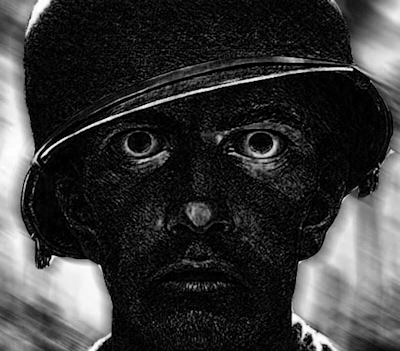

Размер зеленого канала: 351x400


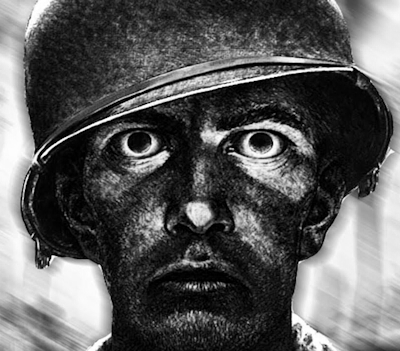

Размер красного канала: 351x400


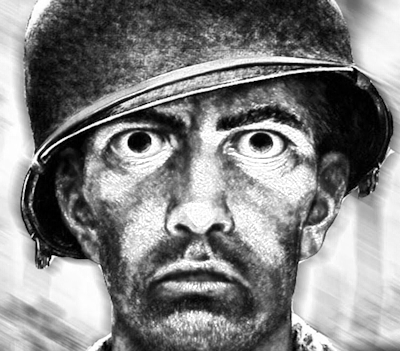

Канал - Синий канал
Размер изображения до фильтра Гаусса: 351x400
Размер изображения после добавления padding: 361x410
Размер изображения после фильтра Гаусса: 351x400


Канал - Зелёный канал
Размер изображения до фильтра Гаусса: 351x400
Размер изображения после добавления padding: 361x410
Размер изображения после фильтра Гаусса: 351x400


Канал - Красный канал
Размер изображения до фильтра Гаусса: 351x400
Размер изображения после добавления padding: 361x410
Размер изображения после фильтра Гаусса: 351x400


Промежуточные изображения каналов после фильтра Гаусса:
Размер синего канала после фильтра Гаусса: 351x400


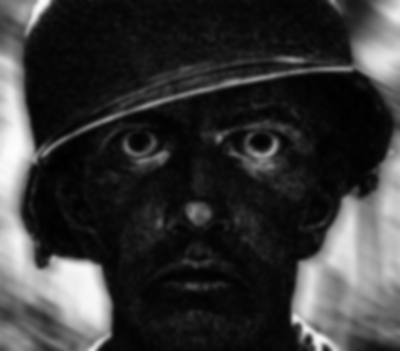

Размер зеленого канала после фильтра Гаусса: 351x400


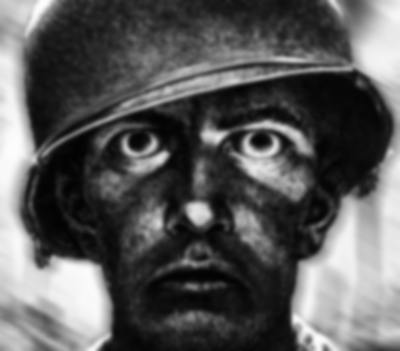

Размер красного канала после фильтра Гаусса: 351x400


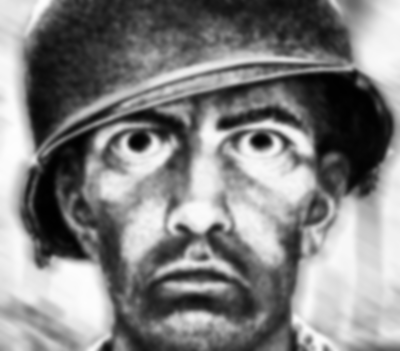



Размер итогового изображения после фильтра Гаусса: 351x400


Исходное изображение:


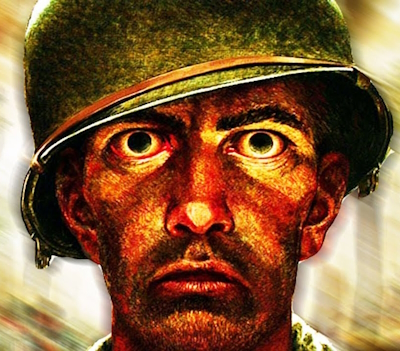




Изображение после фильтра Гаусса:


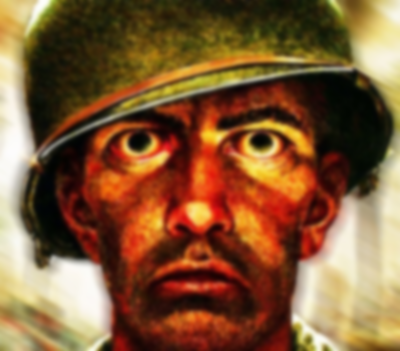

In [6]:
#@title Гауссовый фильтр (итоговый)
def gaussian_filter_manual(img, kernel_size, sigma, chanel):
    print("Канал - " + str(chanel))
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    print(f"Размер изображения до фильтра Гаусса: {rows}x{cols}")

    if kernel_size % 2 == 0:
        print("Ошибка: Размер ядра должен быть нечетным.")
        return None

    padding = kernel_size // 2

    # Создаем расширенное изображение с replicate padding
    padded_img = np.zeros((rows + 2 * padding, cols + 2 * padding), dtype=img.dtype)
    padded_img[padding:rows + padding, padding:cols + padding] = img

    # Заполняем границы
    padded_img[:padding, padding:cols + padding] = img[0, :]  # Верхняя граница
    padded_img[rows + padding:, padding:cols + padding] = img[rows - 1, :]  # Нижняя граница
    padded_img[:, :padding] = np.tile(padded_img[:, padding:padding+1], padding)  # Левая граница
    padded_img[:, cols + padding:] = np.tile(padded_img[:, cols + padding - 1:cols + padding], padding)  # Правая граница

    # Вывод информации о размере увеличенного изображения
    print(f"Размер изображения после добавления padding: {padded_img.shape[0]}x{padded_img.shape[1]}")

    # Создаем ядро Гаусса
    gaussian_kernel = generate_gaussian_kernel(kernel_size, sigma)

    gaussian_filtered_img = np.zeros_like(img, dtype=img.dtype)

    # Применяем фильтр Гаусса ко всему расширенному изображению
    for i in range(padding, rows + padding):
        for j in range(padding, cols + padding):
            window = padded_img[i - padding:i + padding + 1, j - padding:j + padding + 1]
            gaussian_filtered_img[i-padding, j-padding] = np.sum(window * gaussian_kernel)

    print(f"Размер изображения после фильтра Гаусса: {gaussian_filtered_img.shape[0]}x{gaussian_filtered_img.shape[1]}")
    print("")
    print("")
    return gaussian_filtered_img


def gaussian_filter_color(img, kernel_size, sigma):
    """Применяет фильтр Гаусса к цветному изображению с replicate padding."""
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы

    # Вывод промежуточного изображения каналов до фильтра Гаусса
    print("Промежуточные изображения каналов до фильтра Гаусса:")
    print(f"Размер синего канала: {b.shape[0]}x{b.shape[1]}")
    cv2_imshow(b)
    print(f"Размер зеленого канала: {g.shape[0]}x{g.shape[1]}")
    cv2_imshow(g)
    print(f"Размер красного канала: {r.shape[0]}x{r.shape[1]}")
    cv2_imshow(r)

    b_filtered = gaussian_filter_manual(b, kernel_size, sigma, "Синий канал")  # Гауссовый фильтр синего канала
    g_filtered = gaussian_filter_manual(g, kernel_size, sigma, "Зелёный канал")  # Гауссовый фильтр зеленого канала
    r_filtered = gaussian_filter_manual(r, kernel_size, sigma, "Красный канал")  # Гауссовый фильтр красного канала

    if b_filtered is None or g_filtered is None or r_filtered is None:
        print("Ошибка: Произошла ошибка при применении фильтра Гаусса к одному из каналов.")
        return None

    # Вывод промежуточного изображения каналов после фильтра Гаусса
    print("Промежуточные изображения каналов после фильтра Гаусса:")
    print(f"Размер синего канала после фильтра Гаусса: {b_filtered.shape[0]}x{b_filtered.shape[1]}")
    cv2_imshow(b_filtered)
    print(f"Размер зеленого канала после фильтра Гаусса: {g_filtered.shape[0]}x{g_filtered.shape[1]}")
    cv2_imshow(g_filtered)
    print(f"Размер красного канала после фильтра Гаусса: {r_filtered.shape[0]}x{r_filtered.shape[1]}")
    cv2_imshow(r_filtered)

    filtered_img = cv2.merge((b_filtered, g_filtered, r_filtered))  # Объединение каналов
    print("")
    print("")
    print(f"Размер итогового изображения после фильтра Гаусса: {filtered_img.shape[0]}x{filtered_img.shape[1]}")

    return filtered_img

def generate_gaussian_kernel(kernel_size, sigma):
    """Генерирует ядро Гаусса заданного размера и стандартного отклонения."""

    x, y = np.mgrid[-(kernel_size // 2):(kernel_size // 2) + 1, -(kernel_size // 2):(kernel_size // 2) + 1]
    gaussian_kernel = np.exp(- (x**2 + y**2) / (2 * sigma**2))
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)  # Нормализуем ядро
    return gaussian_kernel

# Загрузка изображения и применение фильтра Гаусса
if __name__ == '__main__':
    image_path = img  # Замените на путь к вашему изображению
    kernel_size = 11  # Размер ядра (нечетное число)
    sigma = 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8  # Стандартное отклонение
    print("Sigma = " + str(sigma))
    print('')
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    print(f"Размер исходного изображения: {img.shape[0]}x{img.shape[1]}")
    filtered_img = gaussian_filter_color(img, kernel_size, sigma)

    if filtered_img is not None:
        print("")
        print("")
        print("Исходное изображение:")
        cv2_imshow(img)
        print("")
        print("")
        print("\nИзображение после фильтра Гаусса:")
        cv2_imshow(filtered_img)
    else:
        print("Обработка изображения не удалась.")

In [ ]:
#@title Корректировка освещения (итоговый (коэфициент))
def adjust_brightness_manual(img, brightness_factor, chanel):
    print("Канал - " + str(chanel))
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    print(f"Размер изображения до корректировки освещения: {rows}x{cols}")

    # Преобразуем в float64, чтобы избежать переполнения
    adjusted_img = img.astype(np.float64)

    # Корректируем яркость
    adjusted_img = adjusted_img * brightness_factor

    # Обрезаем значения, чтобы они оставались в диапазоне 0-255
    adjusted_img = np.clip(adjusted_img, 0, 255)

    # Возвращаем к типу uint8
    adjusted_img = adjusted_img.astype(np.uint8)

    print(f"Размер изображения после корректировки освещения: {adjusted_img.shape[0]}x{adjusted_img.shape[1]}")
    print("")
    print("")
    return adjusted_img


def adjust_brightness_color(img, brightness_factor):
    """Применяет корректировку освещения к цветному изображению."""
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы

    # Вывод промежуточного изображения каналов до корректировки освещения
    print("Промежуточные изображения каналов до корректировки освещения:")
    print(f"Размер синего канала: {b.shape[0]}x{b.shape[1]}")
    cv2_imshow(b)
    print(f"Размер зеленого канала: {g.shape[0]}x{g.shape[1]}")
    cv2_imshow(g)
    print(f"Размер красного канала: {r.shape[0]}x{r.shape[1]}")
    cv2_imshow(r)

    b_adjusted = adjust_brightness_manual(b, brightness_factor, "Синий канал")  # Корректировка синего канала
    g_adjusted = adjust_brightness_manual(g, brightness_factor, "Зелёный канал")  # Корректировка зеленого канала
    r_adjusted = adjust_brightness_manual(r, brightness_factor, "Красный канал")  # Корректировка красного канала

    if b_adjusted is None or g_adjusted is None or r_adjusted is None:
        print("Ошибка: Произошла ошибка при корректировке освещения одного из каналов.")
        return None

    # Вывод промежуточного изображения каналов после корректировки освещения
    print("Промежуточные изображения каналов после корректировки освещения:")
    print(f"Размер синего канала после корректировки освещения: {b_adjusted.shape[0]}x{b_adjusted.shape[1]}")
    cv2_imshow(b_adjusted)
    print(f"Размер зеленого канала после корректировки освещения: {g_adjusted.shape[0]}x{g_adjusted.shape[1]}")
    cv2_imshow(g_adjusted)
    print(f"Размер красного канала после корректировки освещения: {r_adjusted.shape[0]}x{r_adjusted.shape[1]}")
    cv2_imshow(r_adjusted)

    adjusted_img = cv2.merge((b_adjusted, g_adjusted, r_adjusted))  # Объединение каналов
    print("")
    print("")
    print(f"Размер итогового изображения после корректировки освещения: {adjusted_img.shape[0]}x{adjusted_img.shape[1]}")

    return adjusted_img

# Загрузка изображения и применение корректировки освещения
if __name__ == '__main__':
    image_path = img # Замените на путь к вашему изображению
    brightness_factor = 3  # Коэффициент корректировки яркости

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    print(f"Размер исходного изображения: {img.shape[0]}x{img.shape[1]}")
    adjusted_img = adjust_brightness_color(img, brightness_factor)

    if adjusted_img is not None:
        print("")
        print("")
        print("Исходное изображение:")
        cv2_imshow(img)
        print("")
        print("")
        print("\nИзображение после корректировки освещения:")
        cv2_imshow(adjusted_img)
    else:
        print("Обработка изображения не удалась.")

Размер исходного изображения: 351x400
Промежуточные изображения каналов до гамма-коррекции:
Размер синего канала: 351x400


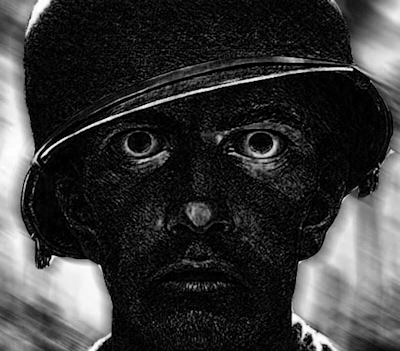

Размер зеленого канала: 351x400


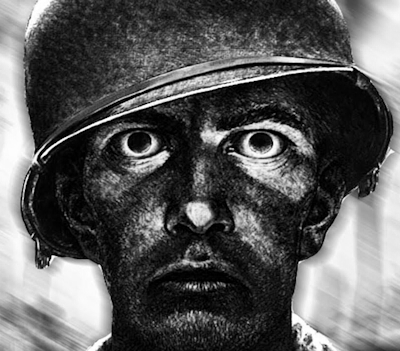

Размер красного канала: 351x400


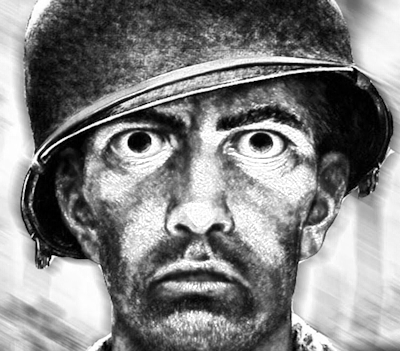

Канал - Синий канал
Размер изображения до гамма-коррекции: 351x400
Размер изображения после гамма-коррекции: 351x400


Канал - Зелёный канал
Размер изображения до гамма-коррекции: 351x400
Размер изображения после гамма-коррекции: 351x400


Канал - Красный канал
Размер изображения до гамма-коррекции: 351x400
Размер изображения после гамма-коррекции: 351x400


Промежуточные изображения каналов после гамма-коррекции:
Размер синего канала после гамма-коррекции: 351x400


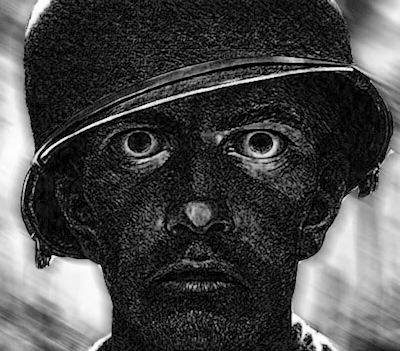

Размер зеленого канала после гамма-коррекции: 351x400


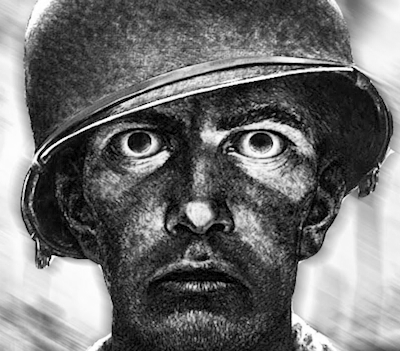

Размер красного канала после гамма-коррекции: 351x400


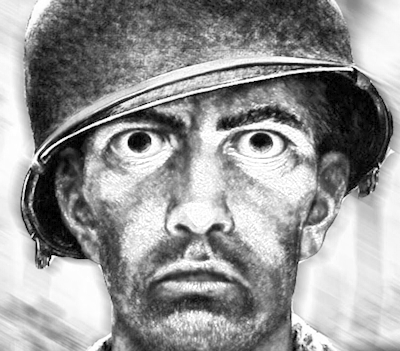



Размер итогового изображения после гамма-коррекции: 351x400


Исходное изображение:


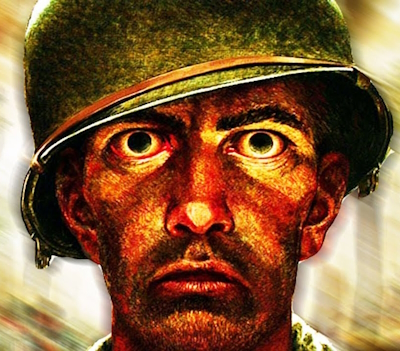




Изображение после гамма-коррекции:


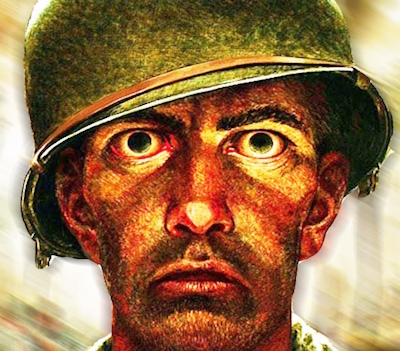

In [3]:
#@title Корректировка освещения (итоговый (градиент))
def adjust_gamma_manual(img, gamma, chanel):
    print("Канал - " + str(chanel))
    if not isinstance(img, np.ndarray):
        print("Ошибка: Входное изображение должно быть NumPy массивом.")
        return None

    rows, cols = img.shape
    print(f"Размер изображения до гамма-коррекции: {rows}x{cols}")

    # 1. Нормализация: Преобразуем в диапазон [0, 1]
    normalized_img = img.astype(np.float64) / 255.0

    # 2. Применение гамма-функции
    gamma_corrected_img = np.power(normalized_img, gamma)

    # 3. Масштабирование обратно в диапазон [0, 255]
    scaled_img = gamma_corrected_img * 255.0

    # 4. Обрезание (clamp) значений
    clipped_img = np.clip(scaled_img, 0, 255)

    # 5. Преобразование в uint8
    final_img = clipped_img.astype(np.uint8)

    print(f"Размер изображения после гамма-коррекции: {final_img.shape[0]}x{final_img.shape[1]}")
    print("")
    print("")
    return final_img


def adjust_gamma_color(img, gamma):
    """Применяет гамма-коррекцию к цветному изображению."""
    if not isinstance(img, np.ndarray) or len(img.shape) != 3:
        print("Ошибка: Входное изображение должно быть цветным (RGB) NumPy массивом.")
        return None

    b, g, r = cv2.split(img)  # Разделение на каналы

    # Вывод промежуточного изображения каналов до гамма-коррекции
    print("Промежуточные изображения каналов до гамма-коррекции:")
    print(f"Размер синего канала: {b.shape[0]}x{b.shape[1]}")
    cv2_imshow(b)
    print(f"Размер зеленого канала: {g.shape[0]}x{g.shape[1]}")
    cv2_imshow(g)
    print(f"Размер красного канала: {r.shape[0]}x{r.shape[1]}")
    cv2_imshow(r)

    b_adjusted = adjust_gamma_manual(b, gamma, "Синий канал")  # Корректировка синего канала
    g_adjusted = adjust_gamma_manual(g, gamma, "Зелёный канал")  # Корректировка зеленого канала
    r_adjusted = adjust_gamma_manual(r, gamma, "Красный канал")  # Корректировка красного канала

    if b_adjusted is None or g_adjusted is None or r_adjusted is None:
        print("Ошибка: Произошла ошибка при гамма-коррекции одного из каналов.")
        return None

    # Вывод промежуточного изображения каналов после гамма-коррекции
    print("Промежуточные изображения каналов после гамма-коррекции:")
    print(f"Размер синего канала после гамма-коррекции: {b_adjusted.shape[0]}x{b_adjusted.shape[1]}")
    cv2_imshow(b_adjusted)
    print(f"Размер зеленого канала после гамма-коррекции: {g_adjusted.shape[0]}x{g_adjusted.shape[1]}")
    cv2_imshow(g_adjusted)
    print(f"Размер красного канала после гамма-коррекции: {r_adjusted.shape[0]}x{r_adjusted.shape[1]}")
    cv2_imshow(r_adjusted)

    adjusted_img = cv2.merge((b_adjusted, g_adjusted, r_adjusted))  # Объединение каналов
    print("")
    print("")
    print(f"Размер итогового изображения после гамма-коррекции: {adjusted_img.shape[0]}x{adjusted_img.shape[1]}")

    return adjusted_img

# Загрузка изображения и применение гамма-коррекции
if __name__ == '__main__':
    image_path = img  # Замените на путь к вашему изображению
    gamma = 0.7  # Гамма-параметр (0 < gamma < 2 обычно дает хорошие результаты)

    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Изображение не найдено по пути: {image_path}.")
    except FileNotFoundError as e:
        print(e)
        exit()
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        exit()

    print(f"Размер исходного изображения: {img.shape[0]}x{img.shape[1]}")
    adjusted_img = adjust_gamma_color(img, gamma)

    if adjusted_img is not None:
        print("")
        print("")
        print("Исходное изображение:")
        cv2_imshow(img)
        print("")
        print("")
        print("\nИзображение после гамма-коррекции:")
        cv2_imshow(adjusted_img)
    else:
        print("Обработка изображения не удалась.")